<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم داده کاوی</b>
<br>
<b><font size=5> استاد درس: دکتر فاطمه شاکری</b>
<hr>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=5>
کتابخانه های موردنیاز را در این بخش بارگذاری کنید.
</p>
</font>
</div>
</font>

In [18]:
%pip install langdetect
%pip install scispacy
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
  Using cached scispacy-0.5.4-py3-none-any.whl.metadata (16 kB)
  Using cached scipy-1.9.3.tar.gz (42.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [37 lines of output]
      + meson setup C:\Users\msi\AppData\Local\Temp\pip-install-70pxo9k0\scipy_b01830b271914014afe98465eb13405f C:\Users\msi\AppData\Local\Temp\pip-install-70pxo9k0\scipy_b01830b271914014afe98465eb13405f\.mesonpy-idizizte -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\msi\AppData\Local\Temp\pip-install-70pxo9k0\scipy_b01830b271914014afe98465eb13405f\.mesonpy-idizizte\meson-python-native-file.ini
      The Meson build system
      Version: 1.4.1
      Source dir: C:\Users\msi\AppData\Local\Temp\pip-install-70pxo9k0\scipy_b01830b271914014afe98465eb13405f
      Build dir: C:\Users\msi\AppData\Local\Temp\pip-install-70pxo9k0\scipy_b01830b271914014afe98465eb13405f\.mesonpy-idizizte
      Build type: native build
      Project name: SciPy
      Project version: 1.9.3
      Activating VS 17.9.6
      C compiler fo

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz (531.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<font face="B Mitra">
<div dir=rtl>
<font size=5>
نصب پکیج <code>spacy</code> ممکن است وابسته به سیستم‌عامل و پکیج‌منیجر شما نیاز به دستوری متفاوت داشته‌باشد. دستور مناسب را می‌تواند با استفاده از
<a href="https://spacy.io/usage">این لینک</a> بیابید.
</p>
</font>
</div>
</font>

In [22]:

import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> لود کردن مجموعه داده </b>
<br>
<p align="justify">
<font size=5>
فایل مجموعه داده در <a href="https://drive.google.com/file/d/15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae/view?usp=sharing">گوگل درایو</a> در اختیار شما قرار گرفته است:
<br>
همچنین در صورت استفاده از گوگل کولب با استفاده از دستور زیر میتوانید مجموعه داده را از گوگل درایو در نوتبوک خود دانلود کنید.
</p>
</font>
</div>
</font>

!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

<font face="B Mitra">
<div dir=rtl>
<font size=5>
در شروع کار،دیتافریم موردنظر خود را ایجاد کردیم و مقادیر خالی را با space جایگزین کردیم.
دلیل این کار جلوگیری از خطا در مصورسازی انتهایی است.<br>
سپس با توجه به زمانبر بودن اجرا،حداقل یک سمپل 1500 تایی نمونه برداری کردیم.
<br>
برای کسب نتایج بهتر و مصورسازی مناسبتر میتوانیم تعداد سمپل را افزایش دهیم.
</p>
</font>
</div>

In [23]:
df_10k = pd.read_csv('10k_df.csv')

In [24]:
df_10k.fillna(value=" ",inplace=True)

In [25]:
df = df_10k.sample(1500, random_state=42)
del df_10k

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پیش پردازش متن</b>
<br>
<p align="justify">
<font size=5>
 برای پیش پردازش متون از کتابخانه های مختلفی از جمله NLTK ،Gensim یا Spacy میتوان استفاده کرد.
 <br>
 مواردی که در پیش پردازش متون باید به آن توجه کرد.
 <ol>
 <br>
 <li> <b>تشخیص زبان مورداستفاده مقاله ها:</b>
  در این مجموعه داده میتوانید  با استفاده از کتابخانه langdetect زبان مورد استفاده مقاله را در ویژگی <code>body_text</code> بررسی کنید.
 با توجه به نتیجه نهایی خواهید دید که زبان انگلیسی زبان غالب در این مقاله هاست بنابراین میتوان مقاله های غیر انگلیسی را حذف کرد.
 </li>
 <li> <b>توکنایز کردن (Tokenize) مدل ها:</b>
 در این مجموعه داده از  پایپ لاین  <code>en_core_sci_lg</code> از کتابخانه  spaCy به دلیلی پشتبانی از داده های زیستی و پزشکی و با بردارهای 600 هزار کلمه ای و واژگان بزرگتر میتوانیم استفاده کنیم.<br>
 به دلیل اینکه SpaCy حداکثر یک میلیون کاراکتر را بررسی میکند میتوان با استفاده از max_length این محدودیت را کاهش داد:
 لطفا از parser مشخص شده در بخش زیر برای توکنایز کردن متن خود استفاده کنید.


 </li>
 <li> <b> Lemmatization یا Stemming (ریشه یابی) </b>
 </li>
 <li> <b>حذف Stopwords</b> </li>
 <li> <b>حذف علائم نشانه گذاری</b> </li>
 </ol>
<br>
درمورد هر یک از موارد بالا جستجو کنید و پیش پردازش های لازم را برای ویژگی "body text" مقاله انجام دهید.
</p>
</font>
</div>
</font>

In [26]:
#TODO
# Remove all non-english documents
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['body_text'].apply(detect_language)
df = df[df['language'] == 'en']

# Parser
parser = en_core_sci_lg.load()
parser.max_length = 3000000
#TODO
def nlp(text):
    doc = parser(text)
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in STOP_WORDS and token.text not in string.punctuation]
    return ' '.join(tokens)


# Apply preprocessing to body_text column
df['processed_text'] = df['body_text'].apply(nlp)
df.to_csv('preprocessed_covid19_papers.csv', index=False)




<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> استخراج ویژگی </b>
<br>
<p align="justify">
<font size=5>
اکنون که متن بدنهٔ مقاله‌ها را از قبل پردازش کرده‌ایم، زمان تبدیل آن‌ها به قالبی است که توسط الگوریتم‌های ما قابل استفاده باشد. برای این منظور از tf-idf استفاده خواهیم کرد. tf_idf  یک الگوریتم بسیار رایج برای تبدیل متن به نمایش معنی دار اعداد است که اهمیت هر کلمه را در متن موردنظر نشان میدهد. <br>
درمورد عملکرد این روش جستجو کنید.
 برای متن پیش پردازش شده هر مقاله، با استفاده از این روش یک بازنمایی برداری با حداکثر 4096 ویژگی ایجاد کنید.
</p>
</font>
</div>
</font>

In [27]:
# # #TODO

tfidf_vectorizer = TfidfVectorizer(max_features=4096)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.columns)

tfidf_df.to_csv('tfidf_covid19_papers.csv', index=False)





Index(['00', '000', '0001', '001', '002', '003', '005', '01', '02', '03',
       ...
       'zone', 'zoonotic', 'µg', 'µl', 'µm', 'à1', 'κb', 'μg', 'μl', 'μm'],
      dtype='object', length=4096)


<font face="B Mitra"><div dir=rtl>
<font size=6>
<b> PCA </b>
<br>
<p align="justify">
<font size=5>
با توجه به ابعاد بالای هر بردار ویژگی، با استفاده از روش PCA با حفظ 95 درصد واریانس کاهش بعد دهید.
</p>
</font>
</div>

In [28]:
#TODO

pca = PCA(n_components=0.95)
reduced_vectors = pca.fit_transform(tfidf_df)

print("Original shape:", tfidf_df.shape)
print("Reduced shape:", reduced_vectors.shape)

Original shape: (1454, 4096)
Reduced shape: (1454, 949)


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> خوشه بندی </b>
<br>
<p align="justify">
<font size=5>
خوشه بندی مقالات تحقیقاتی مشابه با هم می تواند جستجوی انتشارات مرتبط را ساده کند.  در اینجا از روش K-Means برای خوشه بندی استفاده میکنیم.<br>
 با استفاده از روش Elbow Method  از بین تعداد خوشه های داده شده، میتوانید بهترین تعداد خوشه را بیابید.
<br>
تا 30 خوشه این موضوع را مورد بررسی قرار دهید و پس از یافتن تعداد خوشه مناسب، با استفاده از روش K-Means خوشه بندی لازم را برای بردار ویژگی
بدست آماده از مرحلهٔ قبل به کار بگیرید.
<br><b> بخش امتیازی:</b> میتوانید با به کارگیری روش های دیگر خوشه بندی نظیر خوشه بندی سلسه مراتبی یا DBSCAN نتایج را با استفاده از یک معیار ارزیابی مناسب  مقایسه کنید.
</p>
</font>
</div>

c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kme

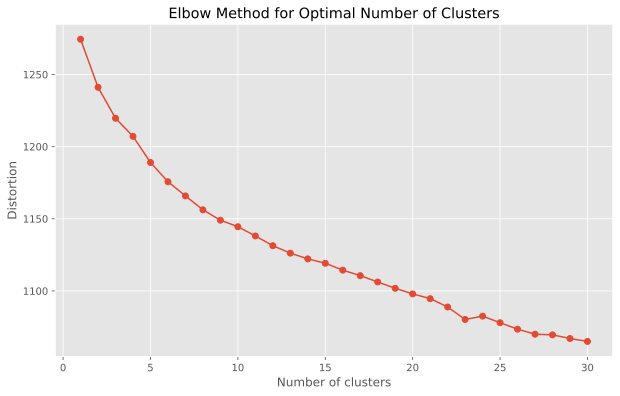

c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 5 22 20 ... 17  0  7]


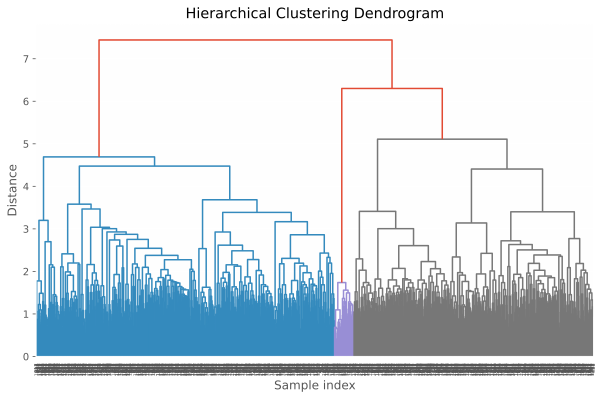

[19  4 21 ... 17  5 22]
DBSCAN did not find enough clusters.
Silhouette Score for K-Means:  0.03038255357965541
Silhouette Score for Hierarchical Clustering:  0.01866108508279374


In [29]:
#TODO

def elbow_method(vectors, max_clusters=30):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(vectors)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

elbow_method(reduced_vectors)


optimal_clusters = 23


kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(reduced_vectors)


labels = kmeans.labels_

print(labels)

#Hierarchical Clustering#
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


Z = linkage(reduced_vectors, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


hierarchical_labels = fcluster(Z, t=optimal_clusters, criterion='maxclust')

print(hierarchical_labels)


#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_vectors)


filtered_labels = [label for label in dbscan_labels if label != -1]


if len(set(filtered_labels)) > 1:
    silhouette_avg = silhouette_score(reduced_vectors[dbscan_labels != -1], filtered_labels)
    print("Silhouette Score for DBSCAN: ", silhouette_avg)
else:
    print("DBSCAN did not find enough clusters.")



silhouette_kmeans = silhouette_score(reduced_vectors, labels)
print("Silhouette Score for K-Means: ", silhouette_kmeans)


silhouette_hierarchical = silhouette_score(reduced_vectors, hierarchical_labels)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_hierarchical)


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> t-SNE </b>
<br>
<p align="justify">
<font size=5>
t_SNE یک روش نظارت نشده غیر خطی است که برای اکتشاف و بصری‌سازی داده‌ها مورد استفاده قرار می‌گیرد.
PCA یک روش کاهش ابعاد خطی است که در تلاش برای بیشینه کردن واریانس و حفظ فاصله‌های زیاد دوتایی‌ها از یکدیگر است. این امر می‌تواند منجر به بصری‌سازی ضعیف به ویژه هنگام کار با ساختارهای غیرخطی می‌شود. t-SNE  با حفظ فاصله‌های کم دوتایی‌ها یا شباهت محلی از PCA متمایز می‌شود. به بیان ساده‌تر، t-SNE به کاربر درکی از اینکه داده‌ها چگونه در فضای ابعاد بالا سازمان‌دهی شده‌اند را ارائه می‌کند. <br>
با استفاده از t-SNE می توانیم بردار ویژگی هایی با ابعاد بالا را به 2 بعد کاهش دهیم.
در این مجموعه داده در 2 بعد می توان توزیع مقالات را با استفاده از scatterplot نمایش داد. <br>
برای تفکیک بصری موضوعات مختلف در نمودار بالا، با استفاده از خوشه هایی که در KMeans یافتید ، برای رنگ آمیزی خوشه های مختلف در مصورسازی خود میتوانید استفاده کنید.
</p>
</font>
</div>

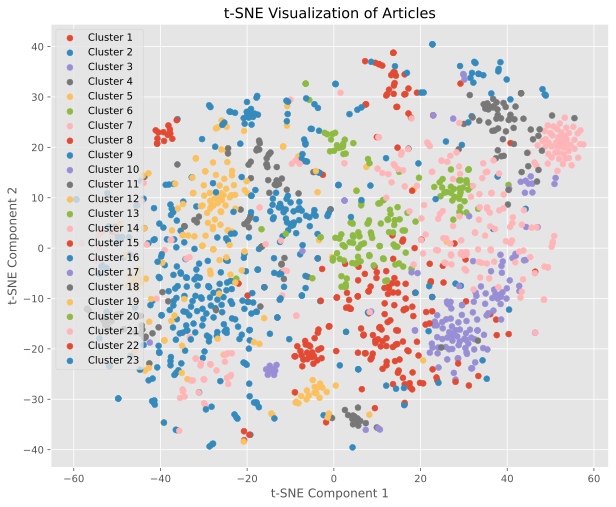

In [30]:
#TODO


tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(reduced_vectors)


plt.figure(figsize=(10, 8))
for i in range(optimal_clusters):
    indices = np.where(labels == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f'Cluster {i+1}')

plt.title('t-SNE Visualization of Articles')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> مدلسازی موضوعی (Topic Modeling)</b>
<br>
<p align="justify">
<font size=5>
اکنون سعی خواهیم کرد موضوعات کلیدی در هر خوشه را پیدا کنیم.
<br>
 K-means مقالات را خوشه بندی کرد اما موضوعات را برچسب گذاری نکرد. از طریق مدل‌سازی موضوع، متوجه خواهیم شد که مهمترین اصطلاحات برای هر خوشه چیست. این کار با دادن کلمات کلیدی برای شناسایی سریع مضامین خوشه، معنای بیشتری به خوشه می بخشد.<br>
برای مدلسازی موضوعی از الگوریتم های مختلفی نظیر NMF,LSA,LDA میتوان استفاده کرد.
<br>
تعداد موضوعاتی که از خوشه ها قصد دارید استخراج کنید، را به دلخواه انتخاب کنید.
<br>
با استفاده از روش (Latent Dirichlet allocation)LDA موضوعات مناسب را به تعداد موردنظر برای هر خوشه بیابید.
سپس کلمات کلیدی هر موضوع برای خوشه موردنظر را چاپ کنید.
<br><b> بخش امتیازی:</b> مدلسازی موضوعی با روشی غیر از LDA انجام دهید و موضوعات خوشه ها را در هردو روش با هم مقایسه کنید.

</p>
</font>
</div>

In [31]:
from gensim.models.ldamodel import LdaModel
import gensim
from sklearn.feature_extraction.text import CountVectorizer

def lda_modeling(texts, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)

    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
    
    return lda_model


num_topics = 3


for cluster_num in set(labels):
    cluster_texts = [df['processed_text'].iloc[i] for i in range(len(labels)) if labels[i] == cluster_num]
    lda_model = lda_modeling(cluster_texts, num_topics)
    print(f"Cluster {cluster_num} LDA Topics:")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx+1}: {topic}")
    print("\n")


from sklearn.decomposition import NMF

def nmf_modeling(texts, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    
    nmf = NMF(n_components=num_topics, random_state=42)
    W = nmf.fit_transform(X)
    H = nmf.components_
    
    feature_names = vectorizer.get_feature_names_out()
    
    topics = []
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        topics.append(top_features)
    
    return topics


for cluster_num in set(labels):
    cluster_texts = [df['processed_text'].iloc[i] for i in range(len(labels)) if labels[i] == cluster_num]
    topics = nmf_modeling(cluster_texts, num_topics)
    print(f"Cluster {cluster_num} NMF Topics:")
    for idx, topic in enumerate(topics):
        print(f"Topic {idx+1}: {', '.join(topic)}")
    print("\n")


for cluster_num in set(labels):
    cluster_texts = [df['processed_text'].iloc[i] for i in range(len(labels)) if labels[i] == cluster_num]
    
    # LDA
    lda_model = lda_modeling(cluster_texts, num_topics)
    print(f"Cluster {cluster_num+1} LDA Topics:")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx+1}: {topic}")
    print("\n")
    
    # NMF
    topics = nmf_modeling(cluster_texts, num_topics)
    print(f"Cluster {cluster_num} NMF Topics:")
    for idx, topic in enumerate(topics):
        print(f"Topic {idx+1}: {', '.join(topic)}")
    print("\n")




Cluster 0 LDA Topics:
Topic 1: 0.014*"particle" + 0.009*"air" + 0.008*"concentration" + 0.008*"room" + 0.006*"ventilation" + 0.006*"case" + 0.006*"virus" + 0.005*"transmission" + 0.005*"study" + 0.005*"patient"
Topic 2: 0.015*"particle" + 0.010*"filter" + 0.008*"aerosol" + 0.007*"virus" + 0.006*"air" + 0.006*"study" + 0.005*"airborne" + 0.005*"10" + 0.005*"high" + 0.005*"et"
Topic 3: 0.009*"particle" + 0.009*"wind" + 0.007*"air" + 0.006*"study" + 0.006*"room" + 0.006*"al" + 0.005*"10" + 0.005*"building" + 0.005*"et" + 0.005*"model"


Cluster 1 LDA Topics:
Topic 1: 0.016*"cell" + 0.007*"protein" + 0.005*"infection" + 0.004*"mouse" + 0.004*"study" + 0.004*"viral" + 0.004*"human" + 0.004*"show" + 0.004*"10" + 0.004*"result"
Topic 2: 0.024*"cell" + 0.010*"virus" + 0.008*"protein" + 0.005*"infection" + 0.005*"study" + 0.004*"gene" + 0.004*"viral" + 0.004*"mouse" + 0.004*"show" + 0.003*"fig"
Topic 3: 0.017*"cell" + 0.007*"protein" + 0.006*"gene" + 0.005*"virus" + 0.005*"infection" + 0.005*"e

c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Cluster 17 NMF Topics:
Topic 1: exposure, risk, model, regression, variable, response, estimate, effect, causal, concentration
Topic 2: model, number, time, epidemic, case, datum, rate, control, disease, distribution
Topic 3: individual, infection, contact, network, disclose, person, disease, state, case, transmission


Cluster 18 NMF Topics:
Topic 1: ifn, type, cell, infection, expression, hcv, treatment, viral, response, effect
Topic 2: al, et, ifn, cell, btv, protein, virus, viral, type, infection
Topic 3: cell, il, response, patient, ifn, protein, result, increase, study, expression


Cluster 19 NMF Topics:
Topic 1: et, al, dog, hydrocephalus, animal, clinical, csf, sign, cat, ventricle
Topic 2: year, mr, dog, association, tumour, committee, animal, veterinary, change, say
Topic 3: dog, infection, shelter, animal, civ, disease, population, clinical, sample, group


Cluster 20 NMF Topics:
Topic 1: study, control, intervention, surveillance, program, community, dengue, include, outbr

c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Cluster 19 LDA Topics:
Topic 1: 0.037*"ifn" + 0.018*"cell" + 0.009*"type" + 0.007*"infection" + 0.007*"response" + 0.007*"al" + 0.006*"et" + 0.006*"protein" + 0.005*"viral" + 0.005*"antiviral"
Topic 2: 0.024*"ifn" + 0.016*"cell" + 0.011*"type" + 0.008*"expression" + 0.008*"response" + 0.008*"infection" + 0.007*"al" + 0.006*"protein" + 0.006*"et" + 0.005*"il"
Topic 3: 0.024*"ifn" + 0.020*"cell" + 0.009*"et" + 0.009*"type" + 0.009*"al" + 0.009*"virus" + 0.007*"response" + 0.007*"viral" + 0.006*"infection" + 0.006*"expression"


Cluster 18 NMF Topics:
Topic 1: ifn, type, cell, infection, expression, hcv, treatment, viral, response, effect
Topic 2: al, et, ifn, cell, btv, protein, virus, viral, type, infection
Topic 3: cell, il, response, patient, ifn, protein, result, increase, study, expression


Cluster 20 LDA Topics:
Topic 1: 0.013*"dog" + 0.009*"animal" + 0.007*"infection" + 0.004*"disease" + 0.004*"clinical" + 0.004*"day" + 0.004*"case" + 0.004*"study" + 0.003*"et" + 0.003*"al"
Topic

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b>  مصورسازی </b>
<br>
<p align="justify">
<font size=4>
<b>این بخش شامل نمره نیست و صرفا جهت درک شما از مراحل انجام شده است</b><br>
<font size=5>
مراحل قبلی برچسب‌های خوشه‌بندی و مجموعه‌ای از مقالات را به دو بعد کاهش داده است. می‌توانیم یک طرح تعاملی از خوشه ها ایجاد کنیم. <br>
شما میتوانید با انتخاب هر خوشه از اسلایدر، توزیع هر خوشه را به صورت مجزا مشاهده کنید. همچنین میتوانید با بردن نشانگر روی هریک از نقاط مشخصات کلی آن مقاله را مشاهده کنید.
<br>
<img src="https://drive.google.com/uc?id=14xXSuD-FhmSSJBI0oH-a-DDkgjBtqj4_" alt="Linear Algebra Cover Art" width="800">
</p>
</font>
</div>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ورودی تابع زیر، دیتافریم مقالات می‌باشد که می‌بایست شامل ستون‌های زیر باشد:
<br>
1. <code>tsne-2d-one</code>: مولفهٔ اول t-SNE
<br>
2. <code>tsne-2d-two</code>: مولفهٔ دوم t-SNE
<br>
3. <code>y</code>: خوشهٔ هر یک از مقالات
</p>
</font>
</div>

In [ ]:
def interactive_plot(df):
    clusters = sorted(df['y'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['y'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['y'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()